<a href="https://colab.research.google.com/github/wonkwonlee/likelion-k-digital-training-AI/blob/main/Python-and-Data-Visualization/tf-cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

#fashion_mnist - 의류 이미지/ 10개의 범주 / 흑백처리 / 28 * 28
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X,test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))


2.4.1
4423680/4422102 [==============================] - 0s 0us/step
60000 10000


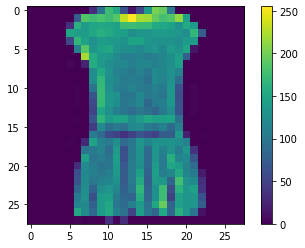

정답 범주 :  3


In [ ]:
import matplotlib.pyplot as plt 
plt.imshow(train_X[3]) 
plt.colorbar()
plt.show()

# 정답 범주 확인
print("정답 범주 : ",train_Y[3])

In [ ]:
train_X = train_X / 255.0
test_X = test_X / 255.0
# print(train_X[0])

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28)), 
                             tf.keras.layers.Dense(units=128,activation='relu'), 
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_X, train_Y,
                    epochs = 500,
                    validation_split = 0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor='val_loss')])

Epoch 1/500
1407/1407 [==============================] - 4s 3ms/step - loss: 0.6653 - accuracy: 0.7707 - val_loss: 0.4507 - val_accuracy: 0.8382
Epoch 2/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3941 - accuracy: 0.8590 - val_loss: 0.3945 - val_accuracy: 0.8599
Epoch 3/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3435 - accuracy: 0.8760 - val_loss: 0.3496 - val_accuracy: 0.8751
Epoch 4/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3156 - accuracy: 0.8843 - val_loss: 0.3491 - val_accuracy: 0.8753
Epoch 5/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3014 - accuracy: 0.8887 - val_loss: 0.3541 - val_accuracy: 0.8705
Epoch 6/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2893 - accuracy: 0.8922 - val_loss: 0.3336 - val_accuracy: 0.8827
Epoch 7/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2682 - accuracy: 0.9014 - val_loss: 0.3674 - val_ac

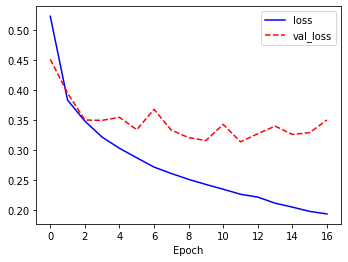

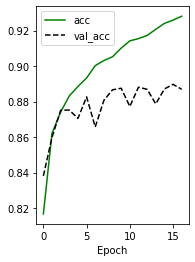

In [ ]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss') 
plt.plot(history.history['val_loss'],'r--',label = 'val_loss') 
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.subplot(1,2,2) 
plt.plot(history.history['accuracy'],'g-',label = 'acc') 
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc') 
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.3903 - accuracy: 0.8781


[0.39026719331741333, 0.8780999779701233]

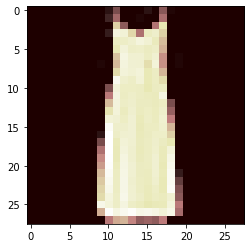

신경망의 예측 확률분포 
 [[1.0001165 1.0002426 1.0000868 1.9995267 1.0000046 1.0000008 1.0000168
  1.        1.0000037 1.0000015]]

 예측 범주:3 실제 범주:3 → 일치 여부 True


In [ ]:
import numpy as np

#예측 수행
pred_X = model.predict(test_X[[13]]) 
#예측 이미지 확인 
plt.imshow(test_X[13], cmap = 'pink') 
plt.show()

#예측 결과 확인
pred_X_argmax = np.argmax(pred_X)
correct = np.equal(pred_X_argmax, test_Y[13])

print("신경망의 예측 확률분포 \n {}".format(pred_X + 1)) 
print("\n 예측 범주:{} 실제 범주:{} → 일치 여부 {}".format(pred_X_argmax, test_Y[13], correct))

## 합성곱 신경망을 활용한 이미지 판별
* 실험 1. 합성곱 계층만 사용
* 실험 2. 풀링 계층과 정규화 기법인 드랍아웃을 함께 사용
* 실험 3. VGGNet 스타일 구축
* 실험 4. VGGNet + 이미지 보강

합성곱 연산을 진행하기 위한 4차원 (미니배치 데이터, 입력 이미지 행, 입력 이미지 열, 입력 채널 수 ) 

reshape() : 기존 3차원 에서 채널이 추가된 4차원 형태로 차원 변경

In [2]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X,test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

# reshape(): 기존 3차원 에서 채널이 추가된 4차원 형태로 차원 변경
print(train_X.shape, test_X.shape) 
train_X = train_X.reshape(-1, 28, 28, 1) 
test_X = test_X.reshape(-1, 28, 28, 1) 
print(train_X.shape,test_X.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


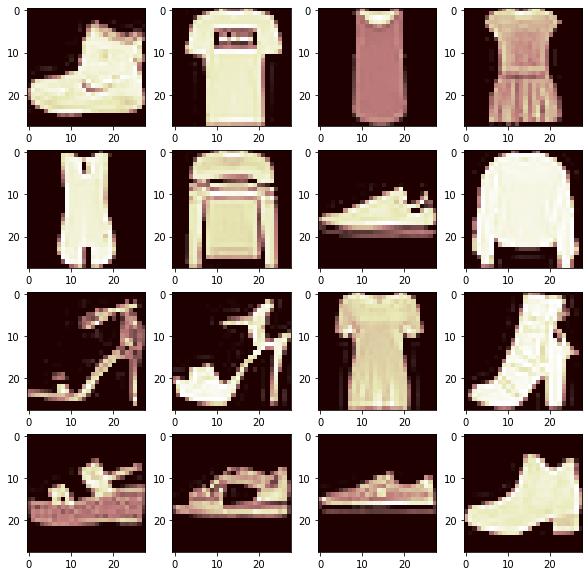

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


(28, 28, 1)

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for i in range(16):
  plt.subplot(4,4,i+1) 
  plt.imshow(train_X[i].reshape(28,28), cmap='pink')

plt.show() 
print(train_Y[:16])

train_X[0].shape

### 실험 1. 풀링 레이어 없이, 단순 합성곱 계층만 활용 
* tf.keras.layers.Conv2D()
  + input_shape : 입력 이미지의 크기 및 채널 
  + kernel_size : 커널 사이즈
  + filters : 몇 개의 필터를 생성할 것 인지
  + strides : 건너뛰기 (default (1,1))
  + padding : 패딩 방식 (default valid)
* tf.keras.layers.Flatten() : 다차원 레이어를 1차원으로 펼쳐준다.

In [4]:
model = tf.keras.Sequential([ 
        tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3), filters=16, strides = (1,1), padding = 'valid'), 
        tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32),
        tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64), 
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(units=128, activation = 'relu'), 
        tf.keras.layers.Dense(units=10, activation = 'softmax')
])

In [5]:
model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

In [6]:
history = model.fit(train_X,train_Y, epochs=500, validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss')])

Epoch 1/500
1407/1407 [==============================] - 39s 5ms/step - loss: 0.5965 - accuracy: 0.7936 - val_loss: 0.4017 - val_accuracy: 0.8547
Epoch 2/500
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3360 - accuracy: 0.8772 - val_loss: 0.3719 - val_accuracy: 0.8652
Epoch 3/500
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2806 - accuracy: 0.8965 - val_loss: 0.3758 - val_accuracy: 0.8695
Epoch 4/500
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2276 - accuracy: 0.9143 - val_loss: 0.3986 - val_accuracy: 0.8719
Epoch 5/500
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1957 - accuracy: 0.9269 - val_loss: 0.4060 - val_accuracy: 0.8738
Epoch 6/500
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1753 - accuracy: 0.9359 - val_loss: 0.4406 - val_accuracy: 0.8723
Epoch 7/500
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1512 - accuracy: 0.9428 - val_loss: 0.4798 - val_a

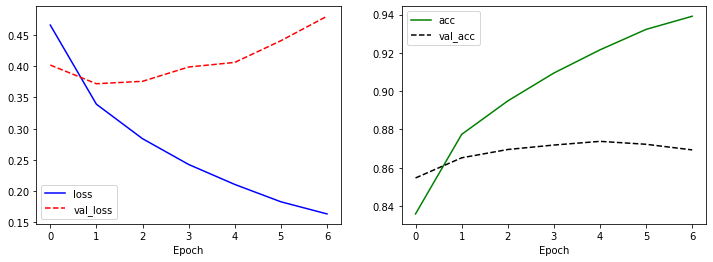

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss') 
plt.plot(history.history['val_loss'],'r--',label = 'val_loss') 
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2) 
plt.plot(history.history['accuracy'],'g-',label = 'acc') 
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [8]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.4994 - accuracy: 0.8653


[0.49939456582069397, 0.8652999997138977]

### 실험 2. 합성곱, 풀링, 드랍아웃 사용
* 최대치 풀링 : tf.keras.layers.MaxPool2D()
  + strides : 건너뛰기
  + pool size : 풀링 사이즈 설정 - 기본값 : (2,2)
* 평균치 풀링 : tf.keras.layers.AveragePool2D()
* 드랍아웃 계층 생성 : tf.keras.layers.Dropout()
  + rate : 이전 계층에서 제외할 뉴런의 비율 설정

In [9]:
model= tf.keras.Sequential([ 
                            tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32), 
                            tf.keras.layers.MaxPool2D(strides = (2,2),pool_size=(2,2)), 
                            tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 64), 
                            tf.keras.layers.AvgPool2D(strides = (2,2)), 
                            tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128), 
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(units=128, activation = 'relu'), 
                            tf.keras.layers.Dropout(rate = 0.3),
                            tf.keras.layers.Dense(units=10, activation = 'softmax')
])

In [10]:
model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
              
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
average_pooling2d (AveragePo (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [11]:
history = model.fit(train_X,train_Y, epochs=500, validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss')])

Epoch 1/500
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7364 - accuracy: 0.7338 - val_loss: 0.4278 - val_accuracy: 0.8412
Epoch 2/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4093 - accuracy: 0.8540 - val_loss: 0.3476 - val_accuracy: 0.8744
Epoch 3/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3641 - accuracy: 0.8665 - val_loss: 0.3353 - val_accuracy: 0.8785
Epoch 4/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3346 - accuracy: 0.8789 - val_loss: 0.3210 - val_accuracy: 0.8830
Epoch 5/500
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3204 - accuracy: 0.8862 - val_loss: 0.3131 - val_accuracy: 0.8878
Epoch 6/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3112 - accuracy: 0.8897 - val_loss: 0.3175 - val_accuracy: 0.8873
Epoch 7/500
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2909 - accuracy: 0.8951 - val_loss: 0.3065 - val_ac

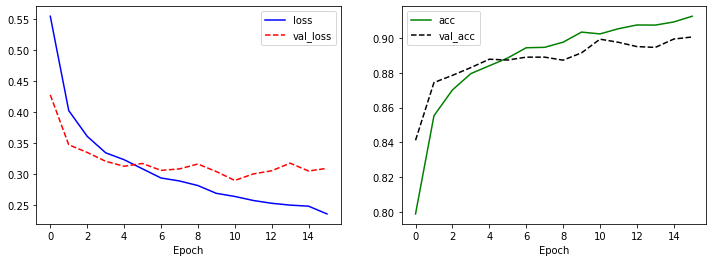

In [12]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss') 
plt.plot(history.history['val_loss'],'r--',label = 'val_loss') 
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2) 
plt.plot(history.history['accuracy'],'g-',label = 'acc') 
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [14]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3207 - accuracy: 0.8996


[0.32070285081863403, 0.8996000289916992]

![cnn](https://user-images.githubusercontent.com/28593767/114665468-099dd480-9d38-11eb-9dcb-231dfba70e83.png)


### 실험 3. VGGNet 스타일 적용
Style Transfer 논문에서도 VGGNet활용
* VGGNet 스타일 일부 적용
  + 합성곱 계층 2개 적용 / 풀링 레이어 삽입 
  + 합성곱 계층 2개 적용 / 풀링 레이어 삽입 
  + 완전 연결 계층 적용
  + 완전 연결 계층 적용
  + 완전 연결 계층 적용

[VGGNet 참고 문헌](https://arxiv.org/pdf/1709.01921.pdf)

[Style Transfer 참고 문헌](https://arxiv.org/pdf/1508.06576.pdf)

In [15]:
model= tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,padding='same',activation='relu'), 
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=64,padding='same',activation='relu'), 
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 128, padding='same', activation='relu'), 
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 256, padding = 'valid', activation='relu'), 
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

In [16]:
model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']) 

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 256)        

In [17]:
history = model.fit(train_X,train_Y, epochs=500, validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5,monitor = 'val_loss')])

Epoch 1/500
1407/1407 [==============================] - 12s 8ms/step - loss: 0.8779 - accuracy: 0.6788 - val_loss: 0.3506 - val_accuracy: 0.8648
Epoch 2/500
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3790 - accuracy: 0.8633 - val_loss: 0.3008 - val_accuracy: 0.8864
Epoch 3/500
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3370 - accuracy: 0.8796 - val_loss: 0.2464 - val_accuracy: 0.9073
Epoch 4/500
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3042 - accuracy: 0.8918 - val_loss: 0.2548 - val_accuracy: 0.9046
Epoch 5/500
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2835 - accuracy: 0.9001 - val_loss: 0.2401 - val_accuracy: 0.9114
Epoch 6/500
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2808 - accuracy: 0.9014 - val_loss: 0.2257 - val_accuracy: 0.9167
Epoch 7/500
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2746 - accuracy: 0.9023 - val_loss: 0.2159 -

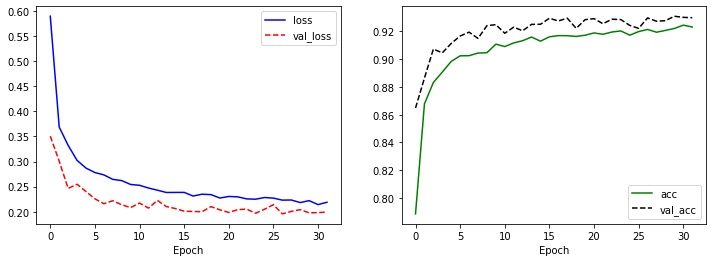

In [18]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss') 
plt.plot(history.history['val_loss'],'r--',label = 'val_loss') 
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2) 
plt.plot(history.history['accuracy'],'g-',label = 'acc') 
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc') 
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.2117 - accuracy: 0.9242


[0.21168583631515503, 0.9241999983787537]

VGGNet을 사용한 결과 매우 높은 accuracy(92%)와 낮은 loss값(21%)를 지니게 되었다.

또한 시각화된 그래프 역시 적절한 모양을 갖추게 되었다.